# Web Scraping

# 📄 HTML Page Structure Explained in Markdown

## 🔤 HTML Tags and Their Roles

- `<!DOCTYPE html>`  
  ➤ Declares the document to be **HTML5**.

- `<html>`  
  ➤ The **root element** of an HTML page.

- `<div>`  
  ➤ Defines a **division or section**, usually used as a **container** for other elements.

- `<head>`  
  ➤ Contains **meta-information** about the document (like charset, title, styles, scripts).

- `<title>`  
  ➤ Specifies the **title** of the document shown in the browser tab.

- `<body>`  
  ➤ Contains the **visible content** of the page (text, images, etc.).

- `<h1>`  
  ➤ Defines a **large heading**—used for main titles.

- `<p>`  
  ➤ Defines a **paragraph** of text.

- `<a>`  
  ➤ Defines a **hyperlink** (anchor tag), used to link to other pages or sections.


In [1]:
from IPython.display import display, HTML

display(HTML("""
<!DOCTYPE html>
<html lang="en">
<head>
  <title>HTML Basics Demo</title>
</head>

<body>
  <h1>Welcome to HTML Basics</h1>
  <h2>Subheading Example</h2>
  <h3>Smaller Heading</h3>

  <p>
    This is a sample paragraph showing different text styles:
    <strong>strong</strong>, <em>italic</em>, <u>underlined</u>,
    <span style="color:blue;">colored text</span>, and <code>inline code</code>.
  </p>

  <p>
    Visit <a href="https://developer.mozilla.org/en-US/">MDN Web Docs</a> for more info.
  </p>

  <p>
    Here's an image:<br>
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/48/Markdown-mark.svg/120px-Markdown-mark.svg.png" alt="Markdown Logo">
  </p>

  <p>Unordered list of fruits:</p>
  <ul>
    <li>Apple</li>
    <li>Banana</li>
    <li>Mango</li>
  </ul>

  <p>Ordered list of learning steps:</p>
  <ol>
    <li>Learn HTML</li>
    <li>Practice CSS</li>
    <li>Build Projects</li>
  </ol>

  <p>Simple Table:</p>
  <table border="1">
    <tr>
      <th>Language</th>
      <th>Type</th>
    </tr>
    <tr>
      <td>Python</td>
      <td>Programming</td>
    </tr>
    <tr>
      <td>HTML</td>
      <td>Markup</td>
    </tr>
  </table>

  <p>
    Line break example:<br>
    Line 1<br>
    Line 2<br>
    Line 3
  </p>

  <hr>

  <!-- End of demonstration -->
</body>
</html>
"""))


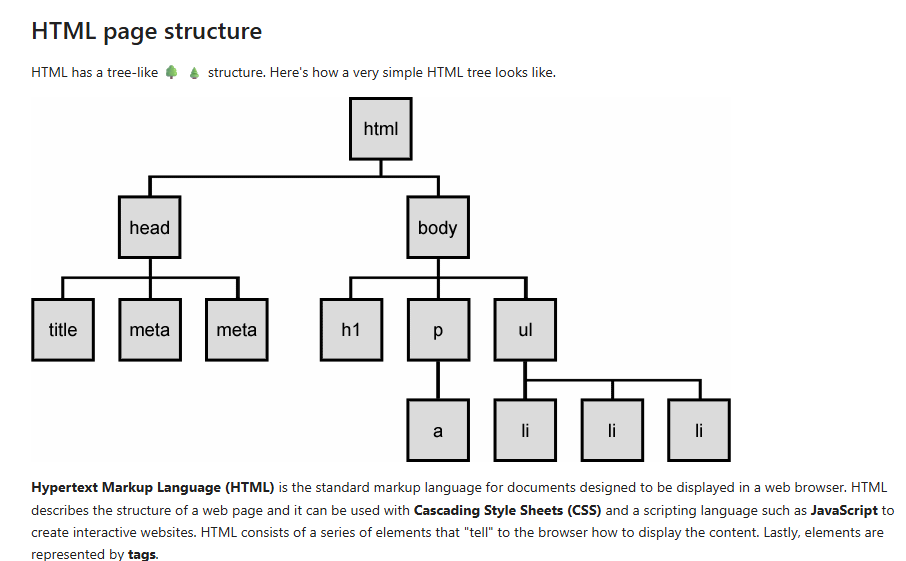

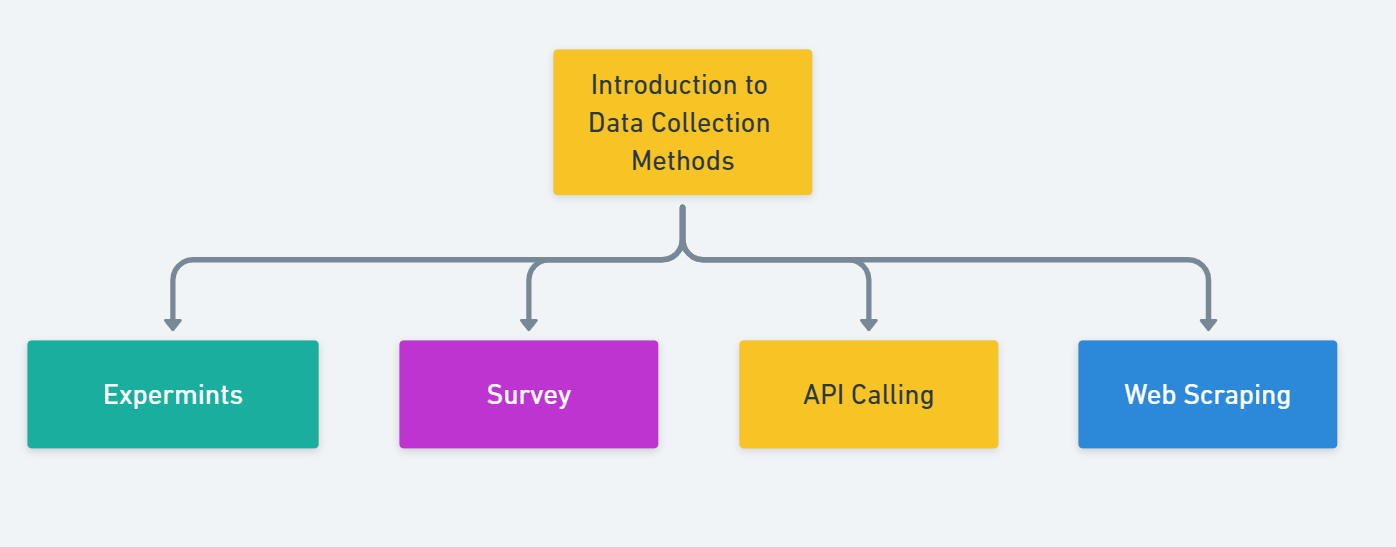

## Chrome DevTools

[Chrome DevTools](https://developers.google.com/web/tools/chrome-devtools/) is a set of web developer tools built directly into the Google Chrome browser. DevTools can help you view and edit web pages. We will use Chrome's tool to inspect an HTML page and find which elements correspond to the data we might want to scrape.

### Short exercise
To get some experience with the HTML page structure and Chrome DevTools, we will search and locate elements in [IMDB](https://www.imdb.com/).

**Tip**: Hit *Command+Option+C* (Mac) or *Control+Shift+C* (Windows, Linux) to access the elements panel.

#### Tasks (we will do them together)
* Find the _Sign in_ button
* Find the IMDB logo.
* What is the _heading_ size of the *Top 10 on IMDb this week* in the main section of the page?

## Web Scraping with `requests` and `BeautifulSoup`

We will use `requests` and `BeautifulSoup` to access and scrape the content of [bookstoscrape's homepage](https://bookstoscrape.com/index.html).

### What is `BeautifulSoup`?

It is a Python library for pulling data out of HTML and XML files. It provides methods to navigate the document's tree structure that we discussed before and scrape its content.

### Our pipeline
<img src='../../../images/scraping/boxofficemojo-pipeline.png' width="1024">

In [2]:
# Imports
import requests
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

%matplotlib inline

In [23]:
# othaim's oils
books = 'https://books.toscrape.com/'

# Use requests to retrieve data from a given URL
books_response = requests.get(books)

In [24]:
books_response

<Response [200]>

<img src='../../../images/scraping/200.jpg' width="1024">
<br/>


`<Response [200]>` is like getting a thumbs-up from the website you asked for information. It means your request went through smoothly, and you're getting the data you wanted. If you see numbers in the 400s, it's like the website saying, "Sorry, we couldn't find what you're looking for." You can find more about these status codes and what they mean [here](https://http.cat/).

Let's take a look at the returned data:

In [32]:
books_response.text.split('a')

['<!DOCTYPE html>\n<!--[if lt IE 7]>      <html l',
 'ng="en-us" cl',
 'ss="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->\n<!--[if IE 7]>         <html l',
 'ng="en-us" cl',
 'ss="no-js lt-ie9 lt-ie8"> <![endif]-->\n<!--[if IE 8]>         <html l',
 'ng="en-us" cl',
 'ss="no-js lt-ie9"> <![endif]-->\n<!--[if gt IE 8]><!--> <html l',
 'ng="en-us" cl',
 'ss="no-js"> <!--<![endif]-->\n    <he',
 'd>\n        <title>\n    All products | Books to Scr',
 'pe - S',
 'ndbox\n</title>\n\n        <met',
 ' http-equiv="content-type" content="text/html; ch',
 'rset=UTF-8" />\n        <met',
 ' n',
 'me="cre',
 'ted" content="24th Jun 2016 09:29" />\n        <met',
 ' n',
 'me="description" content="" />\n        <met',
 ' n',
 'me="viewport" content="width=device-width" />\n        <met',
 ' n',
 'me="robots" content="NOARCHIVE,NOCACHE" />\n\n        <!-- Le HTML5 shim, for IE6-8 support of HTML elements -->\n        <!--[if lt IE 9]>\n        <script src="//html5shim.googlecode.com/svn/trunk/html5.js

We get messy data back with a lot of html code. It's hard to find what we need. But if we turn it into soup (not soup in a bowl), we can easily pick out what we want using HTML tags.

In [6]:
# Parse the whole HTML page using BeautifulSoup
books_soup = BeautifulSoup(books_response.text, 'html.parser')

In [7]:
print(books_soup.prettify())

<!DOCTYPE html>
<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en-us">
 <!--<![endif]-->
 <head>
  <title>
   All products | Books to Scrape - Sandbox
  </title>
  <meta content="text/html; charset=utf-8" http-equiv="content-type"/>
  <meta content="24th Jun 2016 09:29" name="created"/>
  <meta content="" name="description"/>
  <meta content="width=device-width" name="viewport"/>
  <meta content="NOARCHIVE,NOCACHE" name="robots"/>
  <!-- Le HTML5 shim, for IE6-8 support of HTML elements -->
  <!--[if lt IE 9]>
        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>
        <![endif]-->
  <link href="static/oscar/favicon.ico" rel="shortcut icon"/>
  <link href="static/oscar/css/styles.css" rel="stylesheet" type="tex

Now we can easily pick what we want using HTML tags:

In [26]:
# Title of the parsed page
books_soup.title

<title>
    All products | Books to Scrape - Sandbox
</title>

In [27]:
# We can also get it without the HTML tags
books_soup.title.string

'\n    All products | Books to Scrape - Sandbox\n'

### Collect products' name and price

In [10]:
Books_Catgory_list= books_soup.find('div', {'class':'side_categories'})
Books_Catgory_list

<div class="side_categories">
<ul class="nav nav-list">
<li>
<a href="catalogue/category/books_1/index.html">
                            
                                Books
                            
                        </a>
<ul>
<li>
<a href="catalogue/category/books/travel_2/index.html">
                            
                                Travel
                            
                        </a>
</li>
<li>
<a href="catalogue/category/books/mystery_3/index.html">
                            
                                Mystery
                            
                        </a>
</li>
<li>
<a href="catalogue/category/books/historical-fiction_4/index.html">
                            
                                Historical Fiction
                            
                        </a>
</li>
<li>
<a href="catalogue/category/books/sequential-art_5/index.html">
                            
                                Sequential Art
          

In [11]:
# Find all <a> tags within the div
category_links = Books_Catgory_list.find_all('a')

category_links


[<a href="catalogue/category/books_1/index.html">
                             
                                 Books
                             
                         </a>,
 <a href="catalogue/category/books/travel_2/index.html">
                             
                                 Travel
                             
                         </a>,
 <a href="catalogue/category/books/mystery_3/index.html">
                             
                                 Mystery
                             
                         </a>,
 <a href="catalogue/category/books/historical-fiction_4/index.html">
                             
                                 Historical Fiction
                             
                         </a>,
 <a href="catalogue/category/books/sequential-art_5/index.html">
                             
                                 Sequential Art
                             
                         </a>,
 <a href="catalogue/catego

In [12]:
[link['href'] for link in category_links if link.get('href')]

['catalogue/category/books_1/index.html',
 'catalogue/category/books/travel_2/index.html',
 'catalogue/category/books/mystery_3/index.html',
 'catalogue/category/books/historical-fiction_4/index.html',
 'catalogue/category/books/sequential-art_5/index.html',
 'catalogue/category/books/classics_6/index.html',
 'catalogue/category/books/philosophy_7/index.html',
 'catalogue/category/books/romance_8/index.html',
 'catalogue/category/books/womens-fiction_9/index.html',
 'catalogue/category/books/fiction_10/index.html',
 'catalogue/category/books/childrens_11/index.html',
 'catalogue/category/books/religion_12/index.html',
 'catalogue/category/books/nonfiction_13/index.html',
 'catalogue/category/books/music_14/index.html',
 'catalogue/category/books/default_15/index.html',
 'catalogue/category/books/science-fiction_16/index.html',
 'catalogue/category/books/sports-and-games_17/index.html',
 'catalogue/category/books/add-a-comment_18/index.html',
 'catalogue/category/books/fantasy_19/index.

In [13]:
# Extract href attributes
urls = [link['href'].strip() for link in category_links if link.get('href')]

# Optional: Join with base URL if needed
base_url = 'https://books.toscrape.com/'  # Example base URL
full_urls = [base_url + href for href in urls]
print(full_urls)

['https://books.toscrape.com/catalogue/category/books_1/index.html', 'https://books.toscrape.com/catalogue/category/books/travel_2/index.html', 'https://books.toscrape.com/catalogue/category/books/mystery_3/index.html', 'https://books.toscrape.com/catalogue/category/books/historical-fiction_4/index.html', 'https://books.toscrape.com/catalogue/category/books/sequential-art_5/index.html', 'https://books.toscrape.com/catalogue/category/books/classics_6/index.html', 'https://books.toscrape.com/catalogue/category/books/philosophy_7/index.html', 'https://books.toscrape.com/catalogue/category/books/romance_8/index.html', 'https://books.toscrape.com/catalogue/category/books/womens-fiction_9/index.html', 'https://books.toscrape.com/catalogue/category/books/fiction_10/index.html', 'https://books.toscrape.com/catalogue/category/books/childrens_11/index.html', 'https://books.toscrape.com/catalogue/category/books/religion_12/index.html', 'https://books.toscrape.com/catalogue/category/books/nonficti

In [14]:
len(full_urls)

51

We can use `prettify()` method to make the HTML or XML code more readable by adding indentation and line breaks. It formats the structure of the document in a visually appealing way, making it easier for humans to understand.

# Testing

In [15]:
cat_link_response = requests.get('https://books.toscrape.com/catalogue/category/books/travel_2/index.html')
cat_link_soup = BeautifulSoup(cat_link_response.text, 'html.parser')

In [16]:

ol=cat_link_soup.find('ol')

for li in ol:
    print(li)

    print('+++++++++++++++++++++++++++++++++++++++++++++')



+++++++++++++++++++++++++++++++++++++++++++++
<li class="col-xs-6 col-sm-4 col-md-3 col-lg-3">
<article class="product_pod">
<div class="image_container">
<a href="../../../its-only-the-himalayas_981/index.html"><img alt="It's Only the Himalayas" class="thumbnail" src="../../../../media/cache/27/a5/27a53d0bb95bdd88288eaf66c9230d7e.jpg"/></a>
</div>
<p class="star-rating Two">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>
<h3><a href="../../../its-only-the-himalayas_981/index.html" title="It's Only the Himalayas">It's Only the Himalayas</a></h3>
<div class="product_price">
<p class="price_color">Â£45.17</p>
<p class="instock availability">
<i class="icon-ok"></i>
    
        In stock
    
</p>
<form>
<button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
</form>
</div>
</article>
</li>
+++++++++++++++++++++++++++++++++++++++++++++


++++++++++

# Satrting scraping books

In [29]:
Book_links=[]
Book_titles=[]
Book_prices=[]
available=[]
category=[]


# Use requests to retrieve data from a given URL
for cat_link in full_urls:
    #print(cat_link)
    cat_link_response = requests.get(cat_link)
    #print(cat_link_response)
    cat_link_soup = BeautifulSoup(cat_link_response.text, 'html.parser')

    ol=cat_link_soup.find('ol')
    #print(len(ol))

    for li in ol:
        article=li.find('article')

        #print(li.find('p'))

        star_rating=(str(li.find('p')).split('<i')[0].split('star-rating')[-1][:-3])
        #print(str(li.find('p')))
        #print(str(li.find('a')).split('title')[0])
        Book_link= str(li.find('a')).split('title')[0]
        print(Book_link)
        #print(str(li.find('a')).split('title')[0])

        if 'href="../../../' in Book_link:
            #print(Book_category)
            Book_category=cat_link.split('/')[-2]
            #print(Book_category)
            #print(str(li.find('a')).split('href="../../../')[1].split('>')[0])
            Book_link='https://books.toscrape.com/catalogue/'+str(li.find('a')).split('href="../../../')[1].split('>')[0]
            Book_title= str(li.find('h3')).split('title')[-1].split('>')[0][2:-1]
            #print(Book_title)
            Book_price= str(article).split('<p class="price_color">')[-1].split('</p>')[0][2:]
            #print(str(article).split('<p class="price_color">')[-1].split('</p>')[0][2:])
            availability=(str(article).split('<i class="icon-ok"></i>')[-1].split('</p>')[0].strip())
            print(availability)
            #availability= str(article).split('<i class="icon-ok"></i>')[-1].split('-1')[0:9][0].split('-1')
            #print(cat_link)
            #print(availability)
            if 'In stock' in availability:
                 availability='In stock'
            else:
                 availability='Out of stock'
            #print(availability)

            Book_links.append(Book_link)
            Book_titles.append(Book_title)
            Book_prices.append(Book_price)
            available.append(availability)
            category.append(Book_category)

            #print(Book_price)
            #print(Book_link)

            print('_________________________________________________________________')







-1
<a href="../../a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="../../../media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
-1
<a href="../../tipping-the-velvet_999/index.html"><img alt="Tipping the Velvet" class="thumbnail" src="../../../media/cache/26/0c/260c6ae16bce31c8f8c95daddd9f4a1c.jpg"/></a>
-1
<a href="../../soumission_998/index.html"><img alt="Soumission" class="thumbnail" src="../../../media/cache/3e/ef/3eef99c9d9adef34639f510662022830.jpg"/></a>
-1
<a href="../../sharp-objects_997/index.html"><img alt="Sharp Objects" class="thumbnail" src="../../../media/cache/32/51/3251cf3a3412f53f339e42cac2134093.jpg"/></a>
-1
<a href="../../sapiens-a-brief-history-of-humankind_996/index.html"><img alt="Sapiens: A Brief History of Humankind" class="thumbnail" src="../../../media/cache/be/a5/bea5697f2534a2f86a3ef27b5a8c12a6.jpg"/></a>
-1
<a href="../../the-requiem-red_995/index.html"><img alt="The Requiem Red" class="thumbnail" src=

In [21]:
# put all in the dataframe

df = pd.DataFrame({'Book_links':Book_links, 'Book_titles':Book_titles, 'Book_prices':Book_prices,'availability':available,'Book_category':category})
df.availability.unique()


array(['In stock'], dtype=object)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Book_links     517 non-null    object
 1   Book_titles    517 non-null    object
 2   Book_prices    517 non-null    object
 3   availability   517 non-null    object
 4   Book_category  517 non-null    object
dtypes: object(5)
memory usage: 20.3+ KB


In [ ]:
import pandas as pd

# Show all rows
pd.set_option('display.max_rows', None)

# Show all columns
pd.set_option('display.max_columns', None)

# Optional: Expand the column width to fit content
pd.set_option('display.max_colwidth', None)  # or a large number like 200 if using older Pandas

# Optional: Prevent column output from being truncated
pd.set_option('display.width', None)

In [ ]:
"""
<article class="product_pod">
<div class="image_container">
<a href="../../../equal-is-unfair-americas-misguided-fight-against-income-inequality_617/index.html"><img alt="Equal Is Unfair: America's Misguided Fight Against Income Inequality" class="thumbnail" src="../../../../media/cache/00/11/001153d2a22d889837efac1703e10a5e.jpg"/></a>
</div>
<p class="star-rating One">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>
<h3><a href="../../../equal-is-unfair-americas-misguided-fight-against-income-inequality_617/index.html" title="Equal Is Unfair: America's Misguided Fight Against Income Inequality">Equal Is Unfair: America's ...</a></h3>
<div class="product_price">
<p class="price_color">Â£56.86</p>
<p class="instock availability">
<i class="icon-ok"></i>

        In stock
""""

Let's extract the **product name:**

## From web data to analysis


It's a good practice to save the original data before analyzing it further. This way, if we make any changes and need to revert to the original data, we won't have to run the scraping code again, which is often time-consuming.

In [ ]:
df.to_csv('Bookstore.csv')

## Ethical considerations

**You can scrape it, should you though?**


*Here's a good summary of practices for ethical web scraping:*

- Respect the rules: Always check the website's robots.txt file and terms of service (TOS) first. These will tell you if scraping is allowed and what data you can access.
- Be a good guest: Don't overload the website with requests. Space out your scraping requests and be gentle on the server. Avoid scraping during peak hours.
- Identify yourself: Use a user-agent string to identify your scraper as a bot. This allows the website owner to contact you if there are any issues.
- Public data only: Focus on scraping publicly available information, not private user data or sensitive content.
- Check for APIs: Many websites offer APIs (Application Programming Interfaces) that allow you to access data programmatically. This is often the preferred method as it avoids scraping altogether.

- Minimize data collection: only save the data I absolutely need from your page to fulfill my purpose. This helps protect your privacy and bandwidth.

- Inspecting the **robots.txt** file: Always inspect the website's *robots.txt* file for rules about what pages can be scraped, indexed, etc.

### What is a robots.txt?

A simple text file placed on the web server which tells crawlers which file they can and cannot access. It's also called _The Robots Exclusion Protocol_.

<img src='https://github.com/nestauk/im-tutorials/blob/3-ysi-tutorial/figures/Web-Scraping/robots.png?raw=1' width="600">

#### Some examples

In [33]:
print(requests.get('https://www.nesta.org.uk/robots.txt').text)
print('-----')
print(requests.get('https://www.boxofficemojo.com/robots.txt').text)
print('-----')
try:
    print(requests.get('https://www.howtogeek.com/robots.txt').text)
except :
    print("Error due to hottogeek.com is blocking us")

User-Agent: *

Disallow: /search/

Allow: /

-----
# robots.txt for BoxOfficeMojo
User-agent: *
Allow: /

-----
# Valnet content is made available for your non-commercial use subject to our
# Terms of Use here: https://www.valnetinc.com/en/terms-of-use
# Use of any robot, crawler, or other tool to scrape, harvest, extract, or retrieve any content on
# this website using automated means is prohibited without written permission from Valnet.
# Prohibited uses include but are not limited to:
# (1) text and data mining under Art. 4 of the EU Directive on Copyright in the Digital Single
# Market;
# (2) development or operation of artificial intelligence or machine learning software or
# databases, including by training, fine-tuning, embedding, and retrieval-augmented generation;
# (3) creating data sets containing our content or sharing it with others; and
# (4) any commercial purposes.
# Contact info@valnetinc.com for assistance.

User-agent: *
Disallow: /pixel.png*
Disallow: /search/
Disal

### How to get around the blocking?
- Let's use fake user info by defining a header

In [ ]:
headers = { 'User-Agent': 'Mozilla/5.0 (Windows NT 6.0; WOW64; rv:24.0) Gecko/20100101 Firefox/24.0' }

print(requests.get('https://www.howtogeek.com/robots.txt', headers=headers).text)

#### What's a User-Agent?

A User-Agent is a string identifying the browser and operating system to the web server. It's your machine's way of saying _Hi, I am Chrome on macOS_ to a web server.

Web servers use user agents for a variety of purposes:
* Serving different web pages to different web browsers. This can be used for good – for example, to serve simpler web pages to older browsers – or evil – for example, to display a “This web page must be viewed in Internet Explorer” message.
* Displaying different content to different operating systems – for example, by displaying a slimmed-down page on mobile devices.
* Gathering statistics showing the browsers and operating systems in use by their users. If you ever see browser market-share statistics, this is how they’re acquired.

Let's break down the structure of a human-operated User-Agent:

```Mozilla/5.0 (iPad; U; CPU OS 3_2_1 like Mac OS X; en-us) AppleWebKit/531.21.10 (KHTML, like Gecko) Mobile/7B405```

The components of this string are as follows:

* Mozilla/5.0: Previously used to indicate compatibility with the Mozilla rendering engine.
* (iPad; U; CPU OS 3_2_1 like Mac OS X; en-us): Details of the system in which the browser is running.
* AppleWebKit/531.21.10: The platform the browser uses.
* (KHTML, like Gecko): Browser platform details.
* Mobile/7B405: This is used by the browser to indicate specific enhancements that are available directly in the browser or through third parties. An example of this is Microsoft Live Meeting which registers an extension so that the Live Meeting service knows if the software is already installed, which means it can provide a streamlined experience to joining meetings.

When scraping websites, it is a good idea to include your contact information as a custom **User-Agent** string so that the webmaster can get in contact. For example:

In [ ]:
headers = {
    'User-Agent': 'Kostas Stathoulopoulos bot',
    'From': 'konstantinos.stathoulopoulos@nesta.org.uk'
}
request = requests.get('https://www.nesta.org.uk/', headers=headers)
print(request.request.headers)

In [34]:
import requests

headers = {
    'sec-ch-ua-platform': '"Windows"',
    'Referer': 'https://www.nesta.org.uk/',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/140.0.0.0 Safari/537.36',
    'sec-ch-ua': '"Chromium";v="140", "Not=A?Brand";v="24", "Google Chrome";v="140"',
    'sec-ch-ua-mobile': '?0',
}

params = {
    'fields': '_,featured_pages(_,featured_page(_,id,html_url,first_published_at,type,area_of_work,mission,title,content_name_display,listing_date,listing_title,listing_summary,listing_image_rectangle,location,reading_time_minutes,last_published_at,start_date,closes))',
}

response = requests.get('https://www.nesta.org.uk/api/v2/pages/3/', params=params, headers=headers)

In [35]:
response.text

'{\n    "featured_pages": [\n        {\n            "featured_page": {\n                "id": 11389,\n                "meta": {\n                    "type": "toolkits.ToolkitPage",\n                    "html_url": "https://www.nesta.org.uk/toolkit/family-hubs-pregnancy-grant-toolkit/",\n                    "first_published_at": "2025-08-28T08:00:00+01:00"\n                },\n                "title": "Family Hubs Pregnancy Grant Toolkit",\n                "area_of_work": [],\n                "mission": [\n                    {\n                        "id": 8095,\n                        "meta": {\n                            "type": "missions.MissionPage",\n                            "detail_url": "https://www.nesta.org.uk/api/v2/pages/8095/",\n                            "html_url": "https://www.nesta.org.uk/fairer-start/"\n                        },\n                        "title": "A fairer start"\n                    }\n                ],\n                "content_name_display":